# Bike-Related Crashes
## Brian Lindsay
#### Introduction 
Bikes must share roads with other vehicle operators. Unfortunately, incidents occur. The object of this notebook section is to determine which neighborhood in Pittsburgh is the best for bike safety in terms of the least amount of bike incidents.

First, we'll import pandas as necessary.

In [6]:
import pandas as pd
%matplotlib inline

Following that, we will import our dataset, which is 2020 crash data in Allegheny County, and sort it by the crash identitfication number

In [8]:
crashData = pd.read_csv("Allegheny County Crash Data 2020.csv", sep = ",")

In [59]:
crashData.sort_values("CRASH_CRN")

,CRASH_CRN,DISTRICT,CRASH_COUNTY,MUNICIPALITY,POLICE_AGCY,CRASH_YEAR,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,HOUR_OF_DAY,...,LANE_COUNT,RDWY_ORIENT,ROAD_OWNER,ROUTE,SPEED_LIMIT,SEGMENT,OFFSET,STREET_NAME,TOT_INJ_COUNT,SCHOOL_BUS_UNIT
0,2020000005,11,2,2301,02301,2020,1,4,55.0,0.0,...,2.0,S,4,NaN,25.0,NaN,NaN,COMSTOCK WY,0,NaN
1,2020000014,11,2,2301,02301,2020,1,4,140.0,1.0,...,2.0,N,4,NaN,25.0,NaN,NaN,STANTON AV,0,NaN
2,2020000016,11,2,2301,02301,2020,1,4,53.0,0.0,...,2.0,S,2,0019,35.0,251.0,291.0,SAW MILL RUN BL,2,NaN
3,2020000020,11,2,2113,02113,2020,1,4,315.0,3.0,...,2.0,N,4,NaN,25.0,NaN,NaN,DATURA DR,0,NaN
4,2020000023,11,2,2301,02503,2020,1,4,152.0,1.0,...,4.0,S,4,NaN,25.0,NaN,NaN,COMMONWEALTH PL,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9858,2021017633,11,2,2116,02116,2020,10,7,1845.0,18.0,...,2.0,S,2,4003,45.0,17.0,2022.0,MCKNIGHT RD,1,NaN
9859,2021018779,11,2,2464,00000,2020,12,6,630.0,6.0,...,2.0,N,2,0028,65.0,374.0,3802.0,ALLEGHENY VALLEY EX,0,NaN
9860,2021019758,11,2,2301,02301,2020,12,4,1245.0,12.0,...,2.0,S,4,NaN,25.0,NaN,NaN,SENECA ST,1,NaN
9861,2021021042,11,2,2301,02301,2020,11,3,1830.0,18.0,...,2.0,N,4,NaN,25.0,NaN,NaN,FORD ST,0,NaN


This is a lot of rows, mostly due to the fact that this is data for the whole county, not just Pittsburgh. To circumvent this, we apply a mask to the dataset to only show data within Pittsburgh using the Municipality Code 2301

In [62]:
pghQuery = crashData["MUNICIPALITY"] == 2301
pghCrashes = crashData[pghQuery]
pghCrashes

,CRASH_CRN,DISTRICT,CRASH_COUNTY,MUNICIPALITY,POLICE_AGCY,CRASH_YEAR,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,HOUR_OF_DAY,...,LANE_COUNT,RDWY_ORIENT,ROAD_OWNER,ROUTE,SPEED_LIMIT,SEGMENT,OFFSET,STREET_NAME,TOT_INJ_COUNT,SCHOOL_BUS_UNIT
0,2020000005,11,2,2301,02301,2020,1,4,55.0,0.0,...,2.0,S,4,NaN,25.0,NaN,NaN,COMSTOCK WY,0,NaN
1,2020000014,11,2,2301,02301,2020,1,4,140.0,1.0,...,2.0,N,4,NaN,25.0,NaN,NaN,STANTON AV,0,NaN
2,2020000016,11,2,2301,02301,2020,1,4,53.0,0.0,...,2.0,S,2,0019,35.0,251.0,291.0,SAW MILL RUN BL,2,NaN
4,2020000023,11,2,2301,02503,2020,1,4,152.0,1.0,...,4.0,S,4,NaN,25.0,NaN,NaN,COMMONWEALTH PL,0,NaN
12,2020000188,11,2,2301,02301,2020,1,4,1621.0,16.0,...,2.0,E,4,NaN,NaN,NaN,NaN,EVA ST,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9855,2021016340,11,2,2301,00000,2020,11,3,2345.0,23.0,...,2.0,E,1,0376,55.0,684.0,2615.0,PENN LINCOLN PY,1,NaN
9857,2021016383,11,2,2301,00000,2020,11,2,1730.0,17.0,...,3.0,E,1,0376,55.0,740.0,1320.0,PENN LINCOLN PY,1,NaN
9860,2021019758,11,2,2301,02301,2020,12,4,1245.0,12.0,...,2.0,S,4,NaN,25.0,NaN,NaN,SENECA ST,1,NaN
9861,2021021042,11,2,2301,02301,2020,11,3,1830.0,18.0,...,2.0,N,4,NaN,25.0,NaN,NaN,FORD ST,0,NaN


We then apply another mask to this dataset to display only bicycle-related incidents in Pittsburgh

In [63]:
bikeQuery = pghCrashes["BICYCLE"] > 0
pghBikeCrashes = pghCrashes[bikeQuery]
pghBikeCrashes

,CRASH_CRN,DISTRICT,CRASH_COUNTY,MUNICIPALITY,POLICE_AGCY,CRASH_YEAR,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,HOUR_OF_DAY,...,LANE_COUNT,RDWY_ORIENT,ROAD_OWNER,ROUTE,SPEED_LIMIT,SEGMENT,OFFSET,STREET_NAME,TOT_INJ_COUNT,SCHOOL_BUS_UNIT
118,2020001985,11,2,2301,02301,2020,1,3,654.0,6.0,...,3.0,S,4,NaN,25.0,NaN,NaN,ALLEGHENY AV,1,NaN
191,2020003297,11,2,2301,02301,2020,1,5,1938.0,19.0,...,3.0,S,4,NaN,35.0,NaN,NaN,ATLANTIC AV,1,NaN
286,2020004543,11,2,2301,02301,2020,1,5,1400.0,14.0,...,1.0,S,4,NaN,25.0,NaN,NaN,GROSS ST,1,NaN
305,2020004782,11,2,2301,02301,2020,1,2,1355.0,13.0,...,2.0,S,4,NaN,25.0,NaN,NaN,BELLEFIELD AV,1,NaN
906,2020012534,11,2,2301,02301,2020,2,1,1649.0,16.0,...,2.0,S,4,NaN,25.0,NaN,NaN,SHAW AV,1,NaN
1259,2020016587,11,2,2301,02301,2020,2,4,1850.0,18.0,...,2.0,S,4,NaN,25.0,NaN,NaN,EDMOND ST,1,NaN
1500,2020019328,11,2,2301,02301,2020,2,5,2208.0,22.0,...,3.0,S,4,NaN,25.0,NaN,NaN,SHADY AV,1,NaN
1920,2020023876,11,2,2301,02301,2020,3,6,840.0,8.0,...,2.0,N,4,NaN,25.0,NaN,NaN,S BELLEFIELD AV,1,NaN
2053,2020025253,11,2,2301,02301,2020,2,4,2014.0,20.0,...,2.0,S,4,NaN,25.0,NaN,NaN,S NEGLEY AV,1,NaN
2497,2020030596,11,2,2301,02301,2020,4,4,1532.0,15.0,...,2.0,N,4,NaN,25.0,NaN,NaN,CENTRE AV,1,NaN


Thankfully, only 26 rows! However, there are still almost 200 columns to consider. To alleviate this, we take a subset of the dataset to see only columns that may help us determine the neighborhood with the least amount of crashes.

In [64]:
pghBikeCrashes2 = pghBikeCrashes[["CRASH_CRN","CRASH_MONTH","DAY_OF_WEEK","TIME_OF_DAY","LOCATION_TYPE","BICYCLE_COUNT","FATAL_COUNT","INJURY_COUNT","BICYCLE_DEATH_COUNT","BICYCLE_MAJ_INJ_COUNT","DEC_LAT","DEC_LONG","RDWY_SEQ_NUM","ADJ_RDWY_SEQ","ROAD_OWNER","STREET_NAME"]]
pghBikeCrashes2

,CRASH_CRN,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,LOCATION_TYPE,BICYCLE_COUNT,FATAL_COUNT,INJURY_COUNT,BICYCLE_DEATH_COUNT,BICYCLE_MAJ_INJ_COUNT,DEC_LAT,DEC_LONG,RDWY_SEQ_NUM,ADJ_RDWY_SEQ,ROAD_OWNER,STREET_NAME
118,2020001985,1,3,654.0,0,1,0,1,0,0,40.4515,-80.0189,5,5,4,ALLEGHENY AV
191,2020003297,1,5,1938.0,0,1,0,1,0,1,40.4566,-79.9397,6,6,4,ATLANTIC AV
286,2020004543,1,5,1400.0,0,1,0,1,0,0,40.4647,-79.9442,3,4,4,GROSS ST
305,2020004782,1,2,1355.0,0,1,0,1,0,0,40.4481,-79.9526,3,3,4,BELLEFIELD AV
906,2020012534,2,1,1649.0,0,1,0,1,0,0,40.4357,-79.9098,3,4,4,SHAW AV
1259,2020016587,2,4,1850.0,0,1,0,1,0,0,40.4612,-79.9481,3,4,4,EDMOND ST
1500,2020019328,2,5,2208.0,0,1,0,1,0,0,40.4380,-79.9194,3,4,4,SHADY AV
1920,2020023876,3,6,840.0,0,1,0,1,0,0,40.4439,-79.9508,6,6,4,S BELLEFIELD AV
2053,2020025253,2,4,2014.0,0,1,0,1,0,1,40.4583,-79.9338,5,5,4,S NEGLEY AV
2497,2020030596,4,4,1532.0,0,1,0,1,0,0,40.4487,-79.9616,4,3,4,CENTRE AV


We can sort the dataset by the number of major injuries to see the least severe bike incidents

In [66]:
pghBikeCrashes2.sort_values("BICYCLE_MAJ_INJ_COUNT")

,CRASH_CRN,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,LOCATION_TYPE,BICYCLE_COUNT,FATAL_COUNT,INJURY_COUNT,BICYCLE_DEATH_COUNT,BICYCLE_MAJ_INJ_COUNT,DEC_LAT,DEC_LONG,RDWY_SEQ_NUM,ADJ_RDWY_SEQ,ROAD_OWNER,STREET_NAME
118,2020001985,1,3,654.0,0,1,0,1,0,0,40.4515,-80.0189,5,5,4,ALLEGHENY AV
7904,2020093891,10,5,1900.0,0,1,0,1,0,0,40.4687,-79.9159,3,3,4,STANTON AV
7595,2020090493,10,4,848.0,0,1,0,1,0,0,40.4514,-79.9454,4,3,4,DEVONSHIRE ST
6904,2020082310,10,2,1400.0,0,1,0,1,0,0,40.4403,-79.9656,4,3,4,ROBINSON ST
6034,2020072654,9,1,1244.0,0,1,0,1,0,0,40.4601,-79.9460,4,3,4,LIBERTY AV
5969,2020071961,9,5,1610.0,0,1,0,1,0,0,40.4366,-79.9555,3,4,4,MCKEE PL
5917,2020071336,9,3,2230.0,0,1,0,1,0,0,40.4509,-79.9431,3,4,4,ELLSWORTH AV
5805,2020070126,8,4,850.0,0,1,0,1,0,0,40.4511,-79.9358,3,4,4,PEMBROKE PL
4991,2020060867,7,6,1642.0,7,1,0,1,0,0,40.4310,-80.0017,6,6,4,E CARSON ST
4514,2020055062,7,2,1826.0,0,1,0,1,0,0,40.4376,-79.9135,3,3,4,BEECHWOOD BL


Unfortunately, there is no automatic way to sort this data by neighborhood, as the dataset, even in its most narrowed-down form, is county data. Thankfully, the decimal latitude and longitudes of each incident are recorded. After manually finding the neighborhoods where each incident occurred based on latitude and longitude coordinates, the results are:
* Allegheny West - 1 incident
* South Side Flats - 1 incident
* Highland Park - 1 incident
* South Shore - 1 incident
* East Hills - 1 incident
* Brighton Heights - 1 incident
* Strip District - 1 incident
* Terrace Village - 1 incident
* Sheraden - 1 incident, major
* Friendship - 1 incident, major
* Shadyside - 3 incidents
* Bloomfield 4 incidents, 1 major incident
* Squirrel Hill South - 3 incidents, North - 1 incident
* Oakland North - 2 incidents, Central - 1 incident, West - 1 incident

This can be easily tabulated, with non-major incidents getting a value of 1 and major incidents getting a value of 1.5

In [67]:
neighborhoodIncidentData = pd.DataFrame({"Neighborhood" : ["Allegheny West","South Side Flats","Highland Park","South Shore","East Hills","Brighton Heights","Strip District","Terrace Village","Sheraden","Friendship","Shadyside","Bloomfield","Squirrel Hill South","Squirrel Hill North","North Oakland","Central Oakland","West Oakland"], "Incident Count" : [1,1,1,1,1,1,1,1,1.5,1.5,3,5.5,3,1.5,2,1,1]})
#neighborhoodIncidentData.sort_values("Incident Count")
neighborhoodIncidentData

,Neighborhood,Incident Count
0,Allegheny West,1.0
1,South Side Flats,1.0
2,Highland Park,1.0
3,South Shore,1.0
4,East Hills,1.0
5,Brighton Heights,1.0
6,Strip District,1.0
7,Terrace Village,1.0
8,Sheraden,1.5
9,Friendship,1.5


The last step in interpreting this data is to visualize it, which can be done using a choropleth map.

In [57]:
import geopandas
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

In [55]:
incidentMap = neighborhoods.merge(neighborhoodIncidentData, how='left', left_on='hood', right_on='Neighborhood')

<AxesSubplot:>

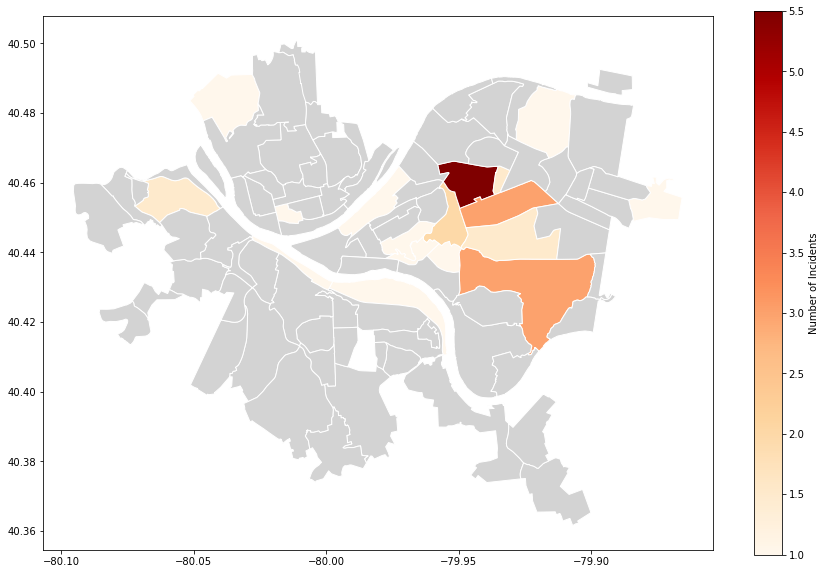

In [54]:
incidentMap.plot(column='Incident Count', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Incidents"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

Here is the final visualization. The neighborhoods with the least amount of bike incidents are the ones shaded the lightest. The worst neighborhoods by this metric are the darker-shaded ones. Additionally, the gray neighborhoods are the ones with no data to compare with.

It can be seen from this choropleth map that the neighborhoods with the least amount of bike incidents are Brighton Heights, Allegheny West, Strip District, South Side Flats, South Shore, Highland Park, East Hills, Terrace Village, and West and Central Oakland.